# Neural Networks 3

## MLP in Keras & TensorFlow

Let's first implement multi-layer perceptron (MLP) networks using TensorFlow and Keras. TensorFlow (TF) provides fast computation on high-dimensional matrices, tensors, and Keras provides high level API for neural network models. 

#### Demo: MNIST Fashion

Let's import the main packages

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


Let's download the MNIST Fashion dataset. MNIST is a more challenging and updated version of the popular MNIST Digits dataset. Keras provides easy-to-use functionality to download many of the popular AI datasets. For the available datasets see:

 * https://www.tensorflow.org/datasets
 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Let's define the class names (integers 0-9).

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's print some statistics.

In [4]:
print('Training data')
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print('Test data')
print(test_images.shape)
print(len(test_labels))

Training data
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
Test data
(10000, 28, 28)
10000


Image resolution is 28 times 28 and the dynamic depth of brightness is 8 bits (values 0..255)

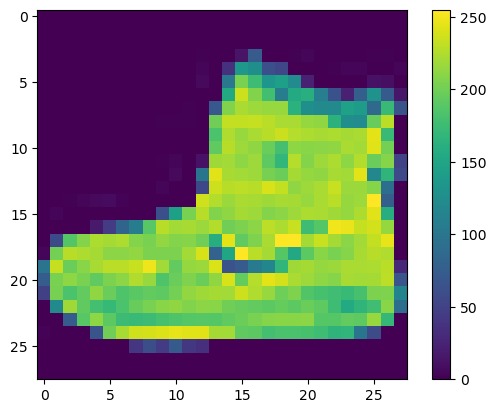

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Let's normalize the brightness values between (0,1) to make them more suitable for neural networks.

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Let's show a number of examples with their labels.

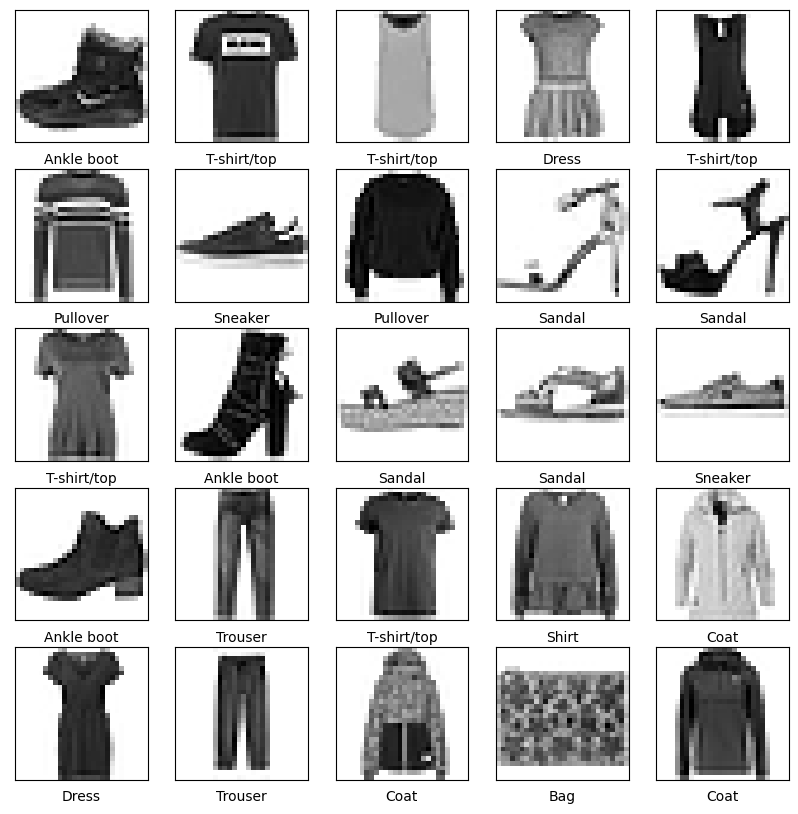

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

For classification, one output per class and "one hot encoding" of the outputs is the best approach.

In [8]:
print('Original labels')
print(train_labels[0:9])
train_labels_onehot = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_onehot = tf.keras.utils.to_categorical(test_labels, num_classes=10)
print('One-hot-encoded labels')
print(train_labels_onehot[0:9,:])
foo = np.argmax(train_labels_onehot,axis=1)
print('Sanity check where one-hot-encoded are converted back to the original digits')
print(foo[0:9])

Original labels
[9 0 0 3 0 2 7 2 5]
One-hot-encoded labels
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Sanity check where one-hot-encoded are converted back to the original digits
[9 0 0 3 0 2 7 2 5]


Let's make a classifer without "hidden layers" (it's not MLP), i.e. 10 independent class-specific decision makers. For this purpose, we use the simplest model construction architecture of TF, that is the Sequential model that enables a single sequential pipeline with one input and one output.

In [9]:
# Simple Sequential structure
model = tf.keras.models.Sequential()

# Flatten 2D input image to a 1D vector
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
print(model.output_shape)

# Add a single layer of 10 neurons each connected to each input
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))
print(model.output_shape)

# Print summary
print(model.summary())

(None, 784)
(None, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


Let's choose the optimized (Stochastic Gradient Descent) and error (MSE), and compile the model.

In [10]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.MeanSquaredError())

Let's see how well the model works without training (random accuracy should be 0.1 i.e. 10% for ten classes).

In [11]:
test_labels_onehot_p = model.predict(test_images) 
test_labels_p = np.argmax(test_labels_onehot_p,axis=1)

test_acc = 1-np.count_nonzero(test_labels-test_labels_p)/len(test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step

Test accuracy: 0.12339999999999995


Let's train for 10 epochs

In [12]:
history = model.fit(train_images, train_labels_onehot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0968
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0743
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0656
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0598
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0557
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0527
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0505
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0487
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0472
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0460


Let's see how well this network learns. We should see when this network converges close to what is the maximum achievable accuracy (loss).

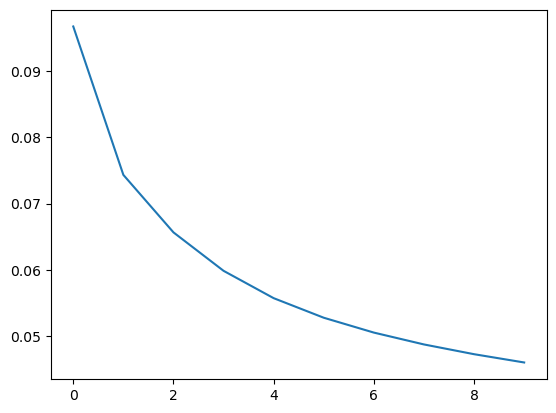

In [13]:
plt.plot(history.history['loss'])

Let's test with test data.

In [14]:
test_labels_onehot_p = model.predict(test_images) 
test_labels_p = np.argmax(test_labels_onehot_p,axis=1)

test_acc = 1-np.count_nonzero(test_labels-test_labels_p)/len(test_labels)

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step

Test accuracy: 0.7269


Let's add neurons to the mid layer so that output decision neurons become aware of the other classes and learn to extract features that are discriminative for each class.

In [15]:
# A Sequential model
model = tf.keras.models.Sequential()

# Flatten 2D input image to a 1D vector
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# Add one full connected layer (hidden layer in MLP terminology)
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))

# Add the output layer of 10 full-connected neurons
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
None


Compile and train.

In [16]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.MeanSquaredError())

In [17]:
history = model.fit(train_images, train_labels_onehot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1808
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1072
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0939
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0904
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0890
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0881
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0875
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0869
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0864
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0859


It's clear from the loss graph that this model cannot achieve the same accuracy as the previous one despite of the same number of trainable parameters. The hidden layer is too small, i.e. ten features cannot well discriminate the 10 classes.

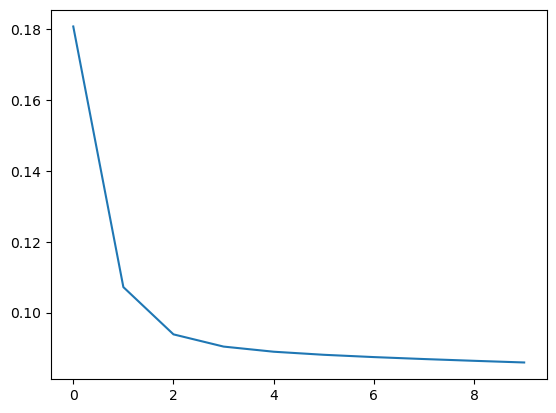

In [18]:
plt.plot(history.history['loss'])

In [19]:
test_labels_onehot_p = model.predict(test_images) 
test_labels_p = np.argmax(test_labels_onehot_p,axis=1)

test_acc = 1-np.count_nonzero(test_labels-test_labels_p)/len(test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step

Test accuracy: 0.395


Let's allow the model to find a larger number of discriminative features by adding more feature extraction neurons to the hidden layer. Note that that means a lot more weights to optimize.

In [20]:
# Sequential model
model = tf.keras.models.Sequential()

# Flatten input image to a vector
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# Hidden layer with a lot more feature extraction neurons
model.add(tf.keras.layers.Dense(512,activation='sigmoid'))

# Output layer of 10 neurons
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])
model.compile(optimizer='SGD',
              loss=tf.keras.losses.MeanSquaredError())

In [22]:
history = model.fit(train_images, train_labels_onehot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0909
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0848
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0810
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0769
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0730
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0694
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0664
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0637
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0615
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0595


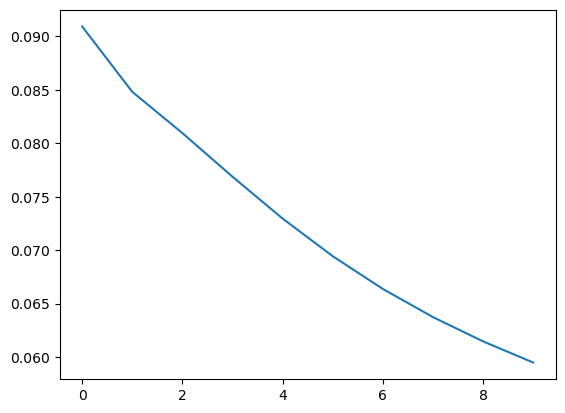

In [23]:
plt.plot(history.history['loss'])

It seems that this model indeed is much more powerful, i.e. the number of hidden layer neurons increases the power of MLP.

In [24]:
test_labels_onehot_p = model.predict(test_images) 
test_labels_p = np.argmax(test_labels_onehot_p,axis=1)

test_acc = 1-np.count_nonzero(test_labels-test_labels_p)/len(test_labels)

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step

Test accuracy: 0.6854


More neurons need more epochs. Let's try another 10 epochs.

In [25]:
history = model.fit(train_images, train_labels_onehot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0577
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0562
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0548
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0536
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0525
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0514
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0505
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0496
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0488
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0480


In [26]:
test_labels_onehot_p = model.predict(test_images) 
test_labels_p = np.argmax(test_labels_onehot_p,axis=1)

test_acc = 1-np.count_nonzero(test_labels-test_labels_p)/len(test_labels)

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step

Test accuracy: 0.7195


Indeed the full-connected layers can boost learning, but now training becomes more like art. How many neurons? What learning rate? How many epochs? Overall the network training definitely becomes slower.

#### Demo: MNIST Fashion w/ additional MLP tricks

First of all, instead of sigmoid output, we could encode outputs as class probabilites that sum to one. This can be done by using the "softmax" non-linearity instead of "sigmoid". A comprehensive list of activation functions is available here:

 * https://keras.io/api/layers/activations/
 
In addition, following the current trend, the sigmoid is changed to ReLu that better avoids the vanishing gradient problem (we will get back to this).   

In [27]:
model = tf.keras.models.Sequential()

# Flatten input image to a vector
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
print(model.output_shape)

# Hidden layer (sigmoid -> relu)
model.add(tf.keras.layers.Dense(512,activation='relu'))
print(model.output_shape)

# Output layer of 10 neurons (sigmoid -> softmax)
model.add(tf.keras.layers.Dense(10,activation='softmax'))
print(model.output_shape)

print(model.summary())

(None, 784)
(None, 512)
(None, 10)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


It turns out, especially if you are familiar with the Logistic Regression classifiers, that for classification the softmax layer should not be optimized using "stochastic gradient descent" (SGD) but "sparse categorical cross-entropy". Categorical in the sense that classes are one-hot-encoded class probabilities and sparse in the sense that only one of them is hot at time. Softmax+cross-entropy correspond to ML estimation derived for Logistic Regression and work better than MSE and SGD for classification problems.

For more information about different optimizers see:

 * https://keras.io/api/optimizers/
 
For more information about losses see:

 * https://keras.io/api/losses/
 
An easy-to-read discussion about correct combinations of the loss and optimization method can be found from:
 
  * https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8


In [28]:
# SGD -> Adam and MSE->sparse categorial cross entropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Note that Keras takes care of one hot encoding thanks to the "from_logits" setting we provided to the categorial cross-entropy loss.

In [29]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


C:\Users\mahad\anaconda3\envs\DATAML200\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 24s 12ms/step - loss: 0.4712 - accuracy: 0.8315
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3576 - accuracy: 0.8695
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3236 - accuracy: 0.8809
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2993 - accuracy: 0.8895
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2801 - accuracy: 0.8956
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2687 - accuracy: 0.9003
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2543 - accuracy: 0.9060
Epoch 8/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2416 - accuracy: 0.9096
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2299 - accuracy: 0.9132
Epoch 10/10
1875/1875 [==============================] - 32s 17ms/step - lo

The training loss values do not correspond to the previous MSE values, but similar to before we can inspect training behavior by plotting the loss over epochs.

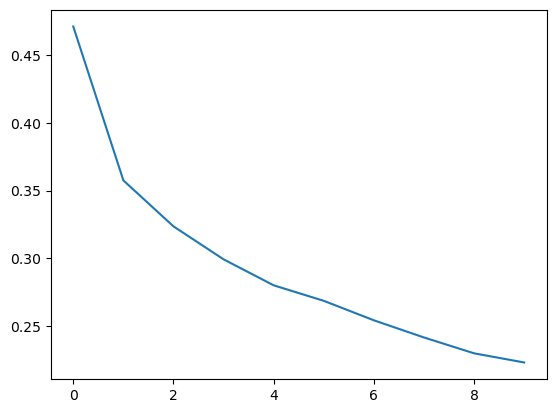

In [30]:
plt.plot(history.history['loss'])

In [31]:
test_labels_onehot_p = model.predict(test_images) 
test_labels_p = np.argmax(test_labels_onehot_p,axis=1)

test_acc = 1-np.count_nonzero(test_labels-test_labels_p)/len(test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step

Test accuracy: 0.8835


Since we build the model using Keras ready-made functionality, we can also evaluate the model with ready-made functionality.

In [32]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3554 - accuracy: 0.8835 - 2s/epoch - 6ms/step

Test accuracy: 0.8834999799728394


## Keras Model APIs

There are three ways to create Keras models:

 * The Sequential model, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers (as the name gives away).
 * The Functional API, which is an easy-to-use, fully-featured API that supports arbitrary model architectures. For most people and most use cases, this is what you should be using. This is the Keras "industry strength" model.
 * Model subclassing, where you implement everything from scratch on your own. Use this if you have complex, out-of-the-box research use cases.

For more information about Keras Model APIs see:

 * https://keras.io/api/models/
 
We have been using the Sequential model API, but next switch to Functional API which is more flexible for our future use cases.

#### Demo: MNIST Fashion (The Sequential Model vs. Functional API)

Sequential model API used hitherto

In [33]:
seq_model = tf.keras.models.Sequential()

# Flatten input image to a vector
seq_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
print(seq_model.output_shape)

seq_model.add(tf.keras.layers.Dense(512,activation='relu'))
print(seq_model.output_shape)

# Add a layer of 10 neurons
seq_model.add(tf.keras.layers.Dense(10,activation='softmax'))
print(seq_model.output_shape)

print(seq_model.summary())

(None, 784)
(None, 512)
(None, 10)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


Functional API used from now on

In [34]:
# declare input shape 
input = tf.keras.Input(shape=(28,28))

# Block of full connected layers
x = tf.keras.layers.Flatten()(input)
x = tf.keras.layers.Dense(512,activation='relu')(x)

# Output layer
output = tf.keras.layers.Dense(10,activation='softmax')(x)

# bind all
func_model = tf.keras.Model(input, output)

Let's compile, train one epoch and test the both models

In [35]:
# compile 
print('Sequential API')
seq_model.compile(
          loss      = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics   = tf.keras.metrics.SparseCategoricalAccuracy(),
          optimizer = tf.keras.optimizers.Adam())
# fit 
seq_model.fit(train_images, train_labels, batch_size=128, epochs=1)

seq_test_loss, seq_test_acc = seq_model.evaluate(test_images,  test_labels, verbose=2)

print('\n  test accuracy:', seq_test_acc)

# compile 
print('\nFunctional API')
func_model.compile(
          loss      = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics   = tf.keras.metrics.SparseCategoricalAccuracy(),
          optimizer = tf.keras.optimizers.Adam())
# fit 
func_model.fit(train_images, train_labels, batch_size=128, epochs=1)

func_test_loss, func_test_acc = func_model.evaluate(test_images,  test_labels, verbose=2)

print('\n  test accuracy:', func_test_acc)

Sequential API
469/469 [==============================] - 14s 27ms/step - loss: 0.5051 - sparse_categorical_accuracy: 0.8227
313/313 - 2s - loss: 0.4186 - sparse_categorical_accuracy: 0.8519 - 2s/epoch - 5ms/step

  test accuracy: 0.8518999814987183

Functional API
469/469 [==============================] - 13s 26ms/step - loss: 0.5072 - sparse_categorical_accuracy: 0.8226
313/313 - 2s - loss: 0.4484 - sparse_categorical_accuracy: 0.8342 - 2s/epoch - 5ms/step

  test accuracy: 0.8342000246047974


# Convolutional Neural Networks (CNNs)

You are now a master of MLPs, i.e. master of how neural networks were used between 1980's to 1990's until they started to be replaced by Support Vector Machine (SVM) classifiers that achieved better results in nearly all applications.

However, in the previous demos we played with rather small images, 28x28, for which the number of network parameters easily reached half a million (0.5M params). It is easy to see that bigger images are not doable anymore. Moreover, translation invariance does not exist.

It's time to move on to the main single invention of modern AI, convolutional neural networks (CNNs), that boomed in 2010's.

Let's define a CNN model using the Functional API as before.

In [36]:
# declare input shape 
input = tf.keras.Input(shape=(28,28,1))

# Block 1 (convolution)
conv1 = tf.keras.layers.Conv2D(32, 3, strides=1, activation="relu")(input)
#x = tf.keras.layers.MaxPooling2D(3)(x)
#x = tf.keras.layers.BatchNormalization()(x)

# Block 2 (convolution 2)
conv2 = tf.keras.layers.Conv2D(64, 3, strides=1, activation="relu")(conv1)
#x = tf.keras.layers.BatchNormalization()(x)
#x = tf.keras.layers.Dropout(0.3)(x)

# Now that we apply global max pooling.
#gap = tf.keras.layers.GlobalMaxPooling2D()(x)

# Block 3 (full connected9)
fc = tf.keras.layers.Flatten()(conv2)
fc = tf.keras.layers.Dense(10)(fc)


# Finally, we add a classification layer.
output = tf.keras.layers.Dense(10, activation="softmax")(fc)

# bind all
cnn_model = tf.keras.Model(input, output)

In [37]:
# This loss takes care of one-hot encoding (see https://keras.io/api/losses/)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

cnn_model.compile(loss=loss_fn, optimizer="adam", metrics=["accuracy"])
cnn_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_6 (Flatten)         (None, 36864)             0         
                                                                 
 dense_11 (Dense)            (None, 10)                368650    
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
Total params: 387,576
Trainable params: 387,576
Non-trainab

Let's train and test (note that things get substantially slower with convolutional layers and without a GPU).

In [38]:
history = cnn_model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 334s 177ms/step - loss: 0.4013 - accuracy: 0.8592


In [39]:
test_loss, test_acc = cnn_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 15s - loss: 0.3196 - accuracy: 0.8839 - 15s/epoch - 49ms/step

Test accuracy: 0.883899986743927


Now you know the main building block of modern neural network models (architectures), but to understand some new concepts such as

 * ReLu
 * MaxPooling
 * BatchNormalization
 
 we need to talk about how it all started, i.e. the backbone networks.

## References

TensorFlow Tutorials. URL: https://www.tensorflow.org/tutorials